In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

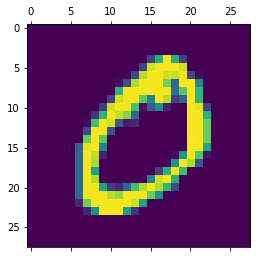

In [8]:
plt.matshow(x_train[1])

In [9]:
y_train[2]

4

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
x_train_flattened.shape

(60000, 784)

In [14]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 5ms/step - loss: 0.4676 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3038 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2732 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2661 - accuracy: 0.9259


In [16]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2671 - accuracy: 0.9272


[0.26712459325790405, 0.9272000193595886]

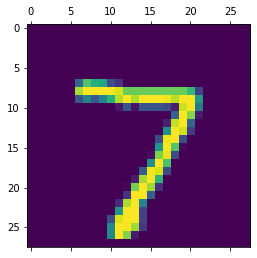

In [17]:
plt.matshow(x_test[0])

In [18]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.9737175e-02, 5.3899356e-07, 9.0796620e-02, 9.5777208e-01,
       2.5671721e-03, 1.6926455e-01, 2.6850500e-06, 9.9979687e-01,
       8.2550317e-02, 6.7451429e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    3,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  938,   13,    9,    6,   11,    8,   31,    4],
       [   3,    0,   24,  914,    1,   32,    2,    9,   17,    8],
       [   1,    1,    4,    1,  926,    0,   10,    3,    8,   28],
       [   7,    3,    4,   18,   12,  801,   14,    3,   23,    7],
       [  12,    3,    6,    1,    7,   14,  912,    2,    1,    0],
       [   2,    7,   25,    7,   10,    0,    0,  937,    2,   38],
       [   8,    9,    8,   23,    9,   40,    9,    8,  851,    9],
       [  11,    7,    1,   11,   32,    9,    0,   15,    5,  918]])>

Text(69.0, 0.5, 'Truth')

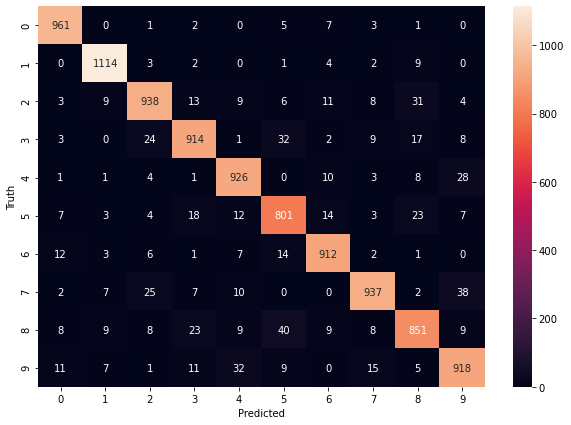

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD",histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6410 - accuracy: 0.8359
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3378 - accuracy: 0.9055
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2917 - accuracy: 0.9176
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2637 - accuracy: 0.9258
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2427 - accuracy: 0.9318


In [25]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0797 - accuracy: 0.9758


[0.07971661537885666, 0.9757999777793884]

Text(69.0, 0.5, 'Truth')

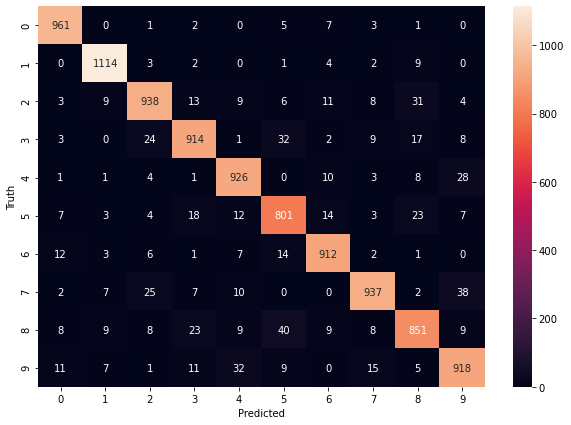

In [26]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2746 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1256 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0889 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0677 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0534 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0421 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0352 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0238 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 9ms/step - loss: 0.0780 - accuracy: 0.9780


[0.07800040394067764, 0.9779999852180481]

Text(69.0, 0.5, 'Truth')

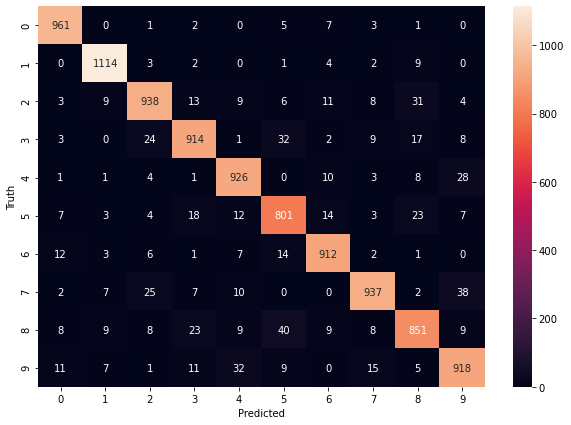

In [29]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')